In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for improved aesthetics

C:\Users\JohnvanOsta\AppData\Local\Temp\ipykernel_16564\3882868976.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Get combined mechanistic and ml model results data
mech_ml_estimates = pd.read_excel('Example_data\Output\Predictions\mech_ml_combined_estimates_20231119.xlsx')

In [3]:
mech_ml_estimates

,DateTime,TagID,easting,northing,Tower_count,Data_type,Signal_count,mean_distance_from_tower,ML_model_error_1_tower_group_m,ML_model_error_8_tower_groups_m,Mech_model_error_triangulation_m,Mech_hybrid_model_error_m
0,2021-02-02 07:51:00,60,423203.210195,7.575845e+06,2,BTFS,4,78.187231,155.389829,138.337086,NaN,17.021235
1,2021-02-02 07:54:00,60,423203.210195,7.575845e+06,2,BTFS,15,78.187231,195.626005,166.532408,NaN,157.247101
2,2021-02-04 18:36:00,52,427298.584493,7.565190e+06,4,BTFS,31,292.368227,150.717962,139.613938,3303.931032,221.561476
3,2021-02-04 18:39:00,52,427298.584493,7.565190e+06,4,BTFS,10,292.368227,81.234770,74.111154,NaN,118.013701
4,2021-09-17 10:21:00,97,427345.279253,7.565517e+06,2,BTFS,4,129.538681,170.705523,94.663625,NaN,107.336450
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2023-05-23 10:42:00,192,421233.248221,7.573822e+06,1,BTFS,58,195.221734,103.704216,40.713740,NaN,24.719849
126,2023-05-23 10:45:00,192,421233.248221,7.573822e+06,1,BTFS,56,195.221734,113.396706,69.520533,NaN,25.308771
127,2023-05-23 10:48:00,192,421233.248221,7.573822e+06,1,BTFS,54,195.221734,79.742752,63.500812,NaN,26.915120
128,2023-05-23 10:51:00,192,421233.248221,7.573822e+06,1,BTFS,44,195.221734,98.044576,42.625646,NaN,28.743535


In [4]:
# Combine the ML and Mechanistic data into a single DataFrame suitable for seaborn

# Rename columns and then melt the DataFrame
figure_data = pd.melt(mech_ml_estimates[['ML_model_error_1_tower_group_m', 'ML_model_error_8_tower_groups_m', 'Mech_model_error_triangulation_m', 'Mech_hybrid_model_error_m']], var_name='Model Type', value_name='Error')

# Replace 'error_m' with 'ML model error' and 'error_mech_m' with 'Mechanistic model error' in the 'Model Type' column
figure_data['Model Type'] = figure_data['Model Type'].replace({'ML_model_error_1_tower_group_m': 'Single ML model', 
                                                               'ML_model_error_8_tower_groups_m': 'Multiple ML models', 
                                                               'Mech_hybrid_model_error_m': 'Hybrid model', 
                                                               'Mech_model_error_triangulation_m': 'Mechanistic model'})

# Convert 'Error' values to absolute values
figure_data['Error'] = figure_data['Error'].abs()

# Remove rows with NaN values in the 'Error' column and filter absolute values <= 5000
figure_data = figure_data.dropna(subset=['Error'])
figure_data = figure_data[figure_data['Error'] <= 5000]


In [5]:
figure_data

,Model Type,Error
0,Single ML model,155.389829
1,Single ML model,195.626005
2,Single ML model,150.717962
3,Single ML model,81.234770
4,Single ML model,170.705523
...,...,...
515,Hybrid model,24.719849
516,Hybrid model,25.308771
517,Hybrid model,26.915120
518,Hybrid model,28.743535


c:\Users\JohnvanOsta\Documents\GitHub\ml4rt\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JohnvanOsta\Documents\GitHub\ml4rt\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JohnvanOsta\Documents\GitHub\ml4rt\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

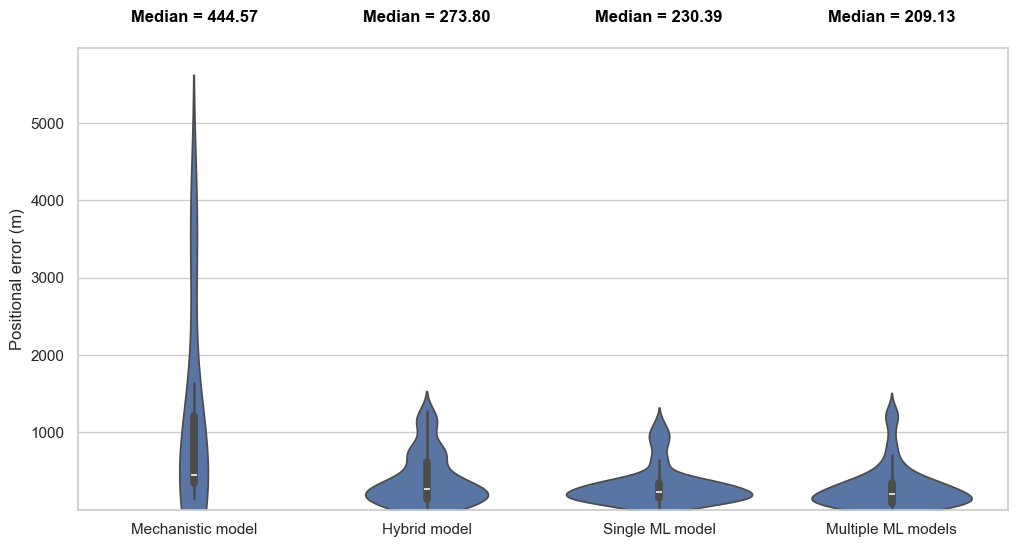

In [8]:
# Set the style with grid lines
sns.set(style="whitegrid")

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))

# Reorder the Model Types
desired_order = ['Mechanistic model', 'Hybrid model', 'Single ML model', 'Multiple ML models']

# Create the boxplot with horizontal grid lines, set y-axis to log10 scale, and adjust y-axis limit
ax = sns.violinplot(data=figure_data, x="Model Type", y="Error", order=desired_order)
plt.ylim(bottom=0.1)  # Set the minimum y-axis value to 0.1 (adjust as needed)

# Label the y-axis
plt.ylabel("Positional error (m)")

# Calculate median values for each Model type
median_values = figure_data.groupby("Model Type")["Error"].median()

# Annotate the plot with median values
for i, model_type in enumerate(desired_order):
    median_val = median_values[model_type]
    ax.text(i, 1.05 * plt.ylim()[1], f"Median = {median_val:.2f}", ha='center', va='bottom', color='black', fontweight='bold')

# Remove x-axis title
plt.xlabel(None)

# Save the plot as an image file (PNG format in this example)
plt.savefig("Paper_results/Figures/ML_vs_hybrid_vs_mech_error_plot_20231119", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


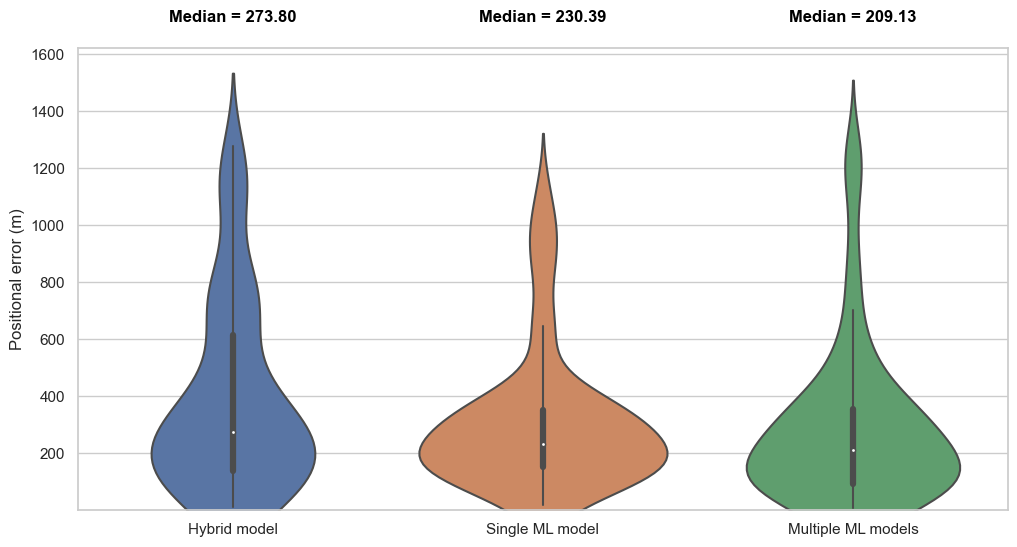

In [9]:
### Figure only for better performing model
# Filter figure_data for Model Type 'ML model' or 'Hybrid model'
figure_data_ml_hybrid = figure_data[figure_data['Model Type'].isin(['Hybrid model', 'Single ML model', 'Multiple ML models'])]

# Set the style with grid lines
sns.set(style="whitegrid")

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))

# Reorder the Model Types
desired_order = ['Hybrid model', 'Single ML model', 'Multiple ML models']

# Create the boxplot with horizontal grid lines, set y-axis to log10 scale, and adjust y-axis limit
ax = sns.violinplot(data=figure_data_ml_hybrid, x="Model Type", y="Error", order=desired_order)
plt.ylim(bottom=0.1)  # Set the minimum y-axis value to 0.1 (adjust as needed)

# Label the y-axis
plt.ylabel("Positional error (m)")

# Calculate median values for each Model type
median_values = figure_data_ml_hybrid.groupby("Model Type")["Error"].median()

# Annotate the plot with median values
for i, model_type in enumerate(desired_order):
    median_val = median_values[model_type]
    plt.text(i, 1.05 * plt.ylim()[1], f"Median = {median_val:.2f}", ha='center', va='bottom', color='black', fontweight='bold')
    
# Remove x-axis title
plt.xlabel(None)

# # Save the plot as an image file (PNG format in this example)
plt.savefig("Paper_results/Figures/ML_vs_hybrid_error_plot_20231119", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


In [10]:
# Calculations for the number of positions that could be estimated using the mechanistic model

# Filter mech_ml_estimates to include the ml estimates based on a combined dataset and for which the mechanistic model
# was able to estiamte a location
mech_ml_estimates_successful_estimates = mech_ml_estimates[(mech_ml_estimates['training_data_type'] == 'Combined') & (~mech_ml_estimates['error_mech_m'].isna()) & (mech_ml_estimates['error_mech_m'] != '')]


KeyError: 'training_data_type'

In [4]:
mech_ml_estimates

,DateTime,TagID,easting,northing,easting_pred,northing_pred,Tower_count,Data_type,Signal_count,xOffset,...,northing_error,error_m,mean_distance_from_tower,training_data_type,inteval_seconds,easting_estimated_mech,northing_estimated_mech,easting_mech_error,northing_mech_error,error_mech_m
0,2021-02-02 07:51:00,60,423203.210195,7.575845e+06,423128.694243,7.575921e+06,2,Tracked bird,4,60.785672,...,75.642357,106.180946,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
1,2021-02-02 07:54:00,60,423203.210195,7.575845e+06,423065.351077,7.575734e+06,2,Tracked bird,15,60.785672,...,-111.071042,177.036472,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
2,2021-02-04 18:36:00,52,427298.584493,7.565190e+06,427436.823929,7.565282e+06,4,Tracked bird,31,-168.960554,...,91.626425,165.847953,292.368227,Combined,13,429709.251945,7.563588e+06,2410.667452,-1601.962361,2894.40857
3,2021-02-04 18:39:00,52,427298.584493,7.565190e+06,427376.232446,7.565197e+06,4,Tracked bird,10,-168.960554,...,6.945487,77.957966,292.368227,Combined,13,NaN,NaN,NaN,NaN,NaN
4,2021-02-10 16:09:00,50,423203.210195,7.575845e+06,423398.945954,7.575982e+06,4,Simulated bird,20,48.473880,...,136.620209,238.699747,70.702270,Combined,13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2023-05-23 10:42:00,192,421233.248221,7.573822e+06,421073.286576,7.574000e+06,1,Tracked bird,58,103.510404,...,177.991583,239.308862,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
734,2023-05-23 10:45:00,192,421233.248221,7.573822e+06,421073.286576,7.574001e+06,1,Tracked bird,56,103.510404,...,179.315599,240.295260,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
735,2023-05-23 10:48:00,192,421233.248221,7.573822e+06,421073.286576,7.573993e+06,1,Tracked bird,54,103.510404,...,171.636033,234.620237,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
736,2023-05-23 10:51:00,192,421233.248221,7.573822e+06,421073.286576,7.573991e+06,1,Tracked bird,44,103.510404,...,169.006520,232.703527,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
